<a href="https://colab.research.google.com/github/Aastha1794/Deep_Learning/blob/master/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Declaration

Declaration: 
By submitting this exam, I declare 
(1) that all work of it is my own; 
(2) that I did not seek whole or partial solutions for any part of my submission from others; and 
(3) that I did not and will not discuss, exchange, share, or publish complete or partial solutions for this exam or any part of it. 
 
 

Name - Aastha Shrivastava
Student ID - 119220530

# CS6421 Final Project: Deep Learning


**Implementing Real-World examples**

This assignment is the core programming assignment for Deep Learning (CS6421). You will be given a tutorial introduction to the deep autoencoder, and will then need to use this model to solve two real-world problems:
- text noise removal
- pedestrian safety analysis on footpaths


## Setup
We start by importing the libraries and functions that we will need.

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

#try:
  # The %tensorflow_version magic only works in colab.
  # tensorflow_version 2.x
#except Exception:
#  pass
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import mnist
print('TensorFlow version:', tf.__version__)
print('Is Executing Eagerly?', tf.executing_eagerly())

TensorFlow version: 2.2.0-rc3
Is Executing Eagerly? True


## Autoencoder model

The encoder and decoder are defined as:
$$ z = f\big(h_{e}(x)\big)$$
$$ \hat{x} = f\big(h_{d}(z)\big),$$
where $z$ is the compressed data representation generated by encoder $h_{e}$, and $\hat{x}$ is the reconstructed data generated by decoder $h_{d}$ based on $z$.

## Part 1 Basic Autoencoder

Encoder - Decoder Models for 3 different Dense layers
Building 3 encoder and decoder layers for 3 different Dense Architectures

In [0]:
#Encoder with 1 layer
class Dense_Encoder1(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Dense_Encoder1, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
    
    def call(self, input_features):
        activation = self.hidden_layer(input_features)
        return self.output_layer(activation)

In [0]:
#Encoder with 2 layers
class Dense_Encoder2(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Dense_Encoder2, self).__init__()
        self.hidden_layer1 = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.hidden_layer2 = tf.keras.layers.Dense(units=intermediate_dim/2, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
    
    def call(self, input_features):
        activation1 = self.hidden_layer1(input_features)
        activation2 = self.hidden_layer2(activation1)
        return self.output_layer(activation2)

In [0]:
#Encoder with 3 layers
class Dense_Encoder3(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Dense_Encoder3, self).__init__()
        self.hidden_layer1 = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.hidden_layer2 = tf.keras.layers.Dense(units=(intermediate_dim)/2, activation=tf.nn.relu)
        self.hidden_layer3 = tf.keras.layers.Dense(units=(intermediate_dim/2)/2, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=(intermediate_dim/2)/2, activation=tf.nn.relu)
    
    def call(self, input_features):
        activation1 = self.hidden_layer1(input_features)
        activation2 = self.hidden_layer2(activation1)
        activation3 = self.hidden_layer3(activation2)
        return self.output_layer(activation3)

In [0]:
#Decoder with 1 layer
class Dense_Decoder1(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Dense_Decoder1, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu)
  
    def call(self, code):
        activation = self.hidden_layer(code)
        return self.output_layer(activation)
      

In [0]:
#Decoder with 3 layers
class Dense_Decoder3(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Dense_Decoder3, self).__init__()
        self.hidden_layer1 = tf.keras.layers.Dense(units=(intermediate_dim/2)/2, activation=tf.nn.relu)
        self.hidden_layer2 = tf.keras.layers.Dense(units=(intermediate_dim)/2, activation=tf.nn.relu)
        self.hidden_layer3 = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu)
  
    def call(self, code):
        activation1 = self.hidden_layer1(code)
        activation2 = self.hidden_layer2(activation1)
        activation3 = self.hidden_layer3(activation2)
        return self.output_layer(activation3)


In [0]:
#Decoder with 2 layers
class Dense_Decoder2(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Dense_Decoder2, self).__init__()
        self.hidden_layer1 = tf.keras.layers.Dense(units=intermediate_dim/2, activation=tf.nn.relu)
        self.hidden_layer2 = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu)
  
    def call(self, code):
        activation1 = self.hidden_layer1(code)
        activation2 = self.hidden_layer2(activation1)
        return self.output_layer(activation2)

In [0]:
#Autoencoder with 1 layer
class Autoencoder1(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder1, self).__init__()
    self.loss = []
    self.encoder = Dense_Encoder1(intermediate_dim=intermediate_dim)
    self.decoder = Dense_Decoder1(intermediate_dim=intermediate_dim, original_dim=original_dim)
  
  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

In [0]:
#Autoencoder with 2 layers
class Autoencoder2(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder2, self).__init__()
    self.loss = []
    self.encoder = Dense_Encoder2(intermediate_dim=intermediate_dim)
    self.decoder = Dense_Decoder2(intermediate_dim=intermediate_dim, original_dim=original_dim)
  
  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

In [0]:
#Autoencoder with 3 layers
class Autoencoder3(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder3, self).__init__()
    self.loss = []
    self.encoder = Dense_Encoder3(intermediate_dim=intermediate_dim)
    self.decoder = Dense_Decoder3(intermediate_dim=intermediate_dim, original_dim=original_dim)
  
  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

**Defining Loss Function ( Reconstruction Error )**

In [0]:
def loss(preds, real):
  return tf.reduce_mean(tf.square(tf.subtract(preds, real)))

**Forward pass and optimization**

In [0]:

def train(loss, model, opt, original):
  with tf.GradientTape() as tape:
    preds = model(original)
    reconstruction_error = loss(preds, original)
  gradients = tape.gradient(reconstruction_error, model.trainable_variables)
  gradient_variables = zip(gradients, model.trainable_variables)
  opt.apply_gradients(gradient_variables)
  return reconstruction_error

**The training loop**

In [0]:
def train_loop(model, opt, loss, dataset, epochs):
  for epoch in range(epochs):
    epoch_loss = 0
    for step, batch_features in enumerate(dataset):
      loss_values = train(loss, model, opt, batch_features)
      epoch_loss += loss_values
    model.loss.append(epoch_loss)
    print('Epoch {}/{}. Loss: {}'.format(epoch + 1, epochs, epoch_loss.numpy()))

**Process the dataset**

In [0]:
#Basic dataset
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train / 255.
x_test = x_test / 255
x_train = x_train.astype(np.float32)
x_train = np.reshape(x_train, (x_train.shape[0], 784))
x_test = np.reshape(x_test, (x_test.shape[0], 784))
training_dataset = tf.data.Dataset.from_tensor_slices(x_train).batch(256)

**Train the model**

Dense Architecture with 1 hidden layer

In [0]:
model1 = Autoencoder1(intermediate_dim=256, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
train_loop(model1, opt, loss, training_dataset, 100)

Epoch 1/100. Loss: 5.881468772888184
Epoch 2/100. Loss: 2.467353343963623
Epoch 3/100. Loss: 2.051097869873047
Epoch 4/100. Loss: 1.8539392948150635
Epoch 5/100. Loss: 1.721449851989746
Epoch 6/100. Loss: 1.6209720373153687
Epoch 7/100. Loss: 1.5660812854766846
Epoch 8/100. Loss: 1.502678632736206
Epoch 9/100. Loss: 1.4573895931243896
Epoch 10/100. Loss: 1.4307678937911987
Epoch 11/100. Loss: 1.3990478515625
Epoch 12/100. Loss: 1.3722424507141113
Epoch 13/100. Loss: 1.3544057607650757
Epoch 14/100. Loss: 1.3351244926452637
Epoch 15/100. Loss: 1.3255409002304077
Epoch 16/100. Loss: 1.2976332902908325
Epoch 17/100. Loss: 1.2836889028549194
Epoch 18/100. Loss: 1.277280330657959
Epoch 19/100. Loss: 1.2695056200027466
Epoch 20/100. Loss: 1.2599016427993774
Epoch 21/100. Loss: 1.2521040439605713
Epoch 22/100. Loss: 1.2347564697265625
Epoch 23/100. Loss: 1.2341614961624146
Epoch 24/100. Loss: 1.2220618724822998
Epoch 25/100. Loss: 1.2111843824386597
Epoch 26/100. Loss: 1.2191239595413208
Epoc

Dense Architecture with 2 hidden layers

In [0]:
model2 = Autoencoder2(intermediate_dim=256, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)
train_loop(model2, opt, loss, training_dataset, 100)

Epoch 1/100. Loss: 19.00274658203125
Epoch 2/100. Loss: 7.88090705871582
Epoch 3/100. Loss: 6.821414470672607
Epoch 4/100. Loss: 6.127042770385742
Epoch 5/100. Loss: 5.744685649871826
Epoch 6/100. Loss: 5.488632678985596
Epoch 7/100. Loss: 5.301207542419434
Epoch 8/100. Loss: 5.19315767288208
Epoch 9/100. Loss: 5.06502628326416
Epoch 10/100. Loss: 4.914708137512207
Epoch 11/100. Loss: 4.822624683380127
Epoch 12/100. Loss: 4.7811279296875
Epoch 13/100. Loss: 4.692879676818848
Epoch 14/100. Loss: 4.6290130615234375
Epoch 15/100. Loss: 4.61336612701416
Epoch 16/100. Loss: 4.571016311645508
Epoch 17/100. Loss: 4.511969089508057
Epoch 18/100. Loss: 4.500580310821533
Epoch 19/100. Loss: 4.395295143127441
Epoch 20/100. Loss: 4.387760639190674
Epoch 21/100. Loss: 4.310163974761963
Epoch 22/100. Loss: 4.326786518096924
Epoch 23/100. Loss: 4.307809352874756
Epoch 24/100. Loss: 4.283895969390869
Epoch 25/100. Loss: 4.2605180740356445
Epoch 26/100. Loss: 4.218851089477539
Epoch 27/100. Loss: 4.207

Dense Architecture with 3 hidden layers

In [0]:
model3 = Autoencoder3(intermediate_dim=256, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)
train_loop(model3, opt, loss, training_dataset, 100)

Epoch 1/100. Loss: 17.328340530395508
Epoch 2/100. Loss: 9.309222221374512
Epoch 3/100. Loss: 7.944074630737305
Epoch 4/100. Loss: 7.229605674743652
Epoch 5/100. Loss: 6.8954596519470215
Epoch 6/100. Loss: 6.621914386749268
Epoch 7/100. Loss: 6.436093807220459
Epoch 8/100. Loss: 6.257150650024414
Epoch 9/100. Loss: 6.064692974090576
Epoch 10/100. Loss: 5.924785614013672
Epoch 11/100. Loss: 5.811689376831055
Epoch 12/100. Loss: 5.746340751647949
Epoch 13/100. Loss: 5.5762763023376465
Epoch 14/100. Loss: 5.532369136810303
Epoch 15/100. Loss: 5.513058185577393
Epoch 16/100. Loss: 5.427633285522461
Epoch 17/100. Loss: 5.32471227645874
Epoch 18/100. Loss: 5.266713619232178
Epoch 19/100. Loss: 5.220932960510254
Epoch 20/100. Loss: 5.176455497741699
Epoch 21/100. Loss: 5.122779846191406
Epoch 22/100. Loss: 5.093738555908203
Epoch 23/100. Loss: 5.012918949127197
Epoch 24/100. Loss: 4.965417861938477
Epoch 25/100. Loss: 4.994542598724365
Epoch 26/100. Loss: 4.907799243927002
Epoch 27/100. Loss:

**Plot the in-training Performance**

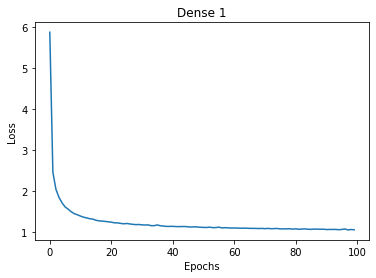

In [0]:
#1 hidden dense layer
plt.plot(range(100), model1.loss)
plt.title( 'Dense 1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


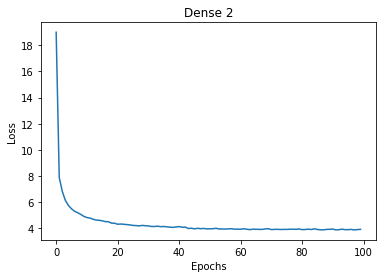

In [0]:
#2 hidden dense layers
plt.plot(range(100), model2.loss)
plt.title( 'Dense 2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

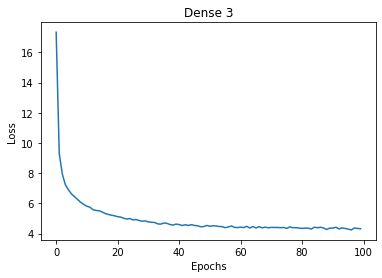

In [0]:
#2 hidden dense layers
plt.plot(range(100), model3.loss)
plt.title( 'Dense 3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

**Predictions**

 Prediction - 1 hidden Layer

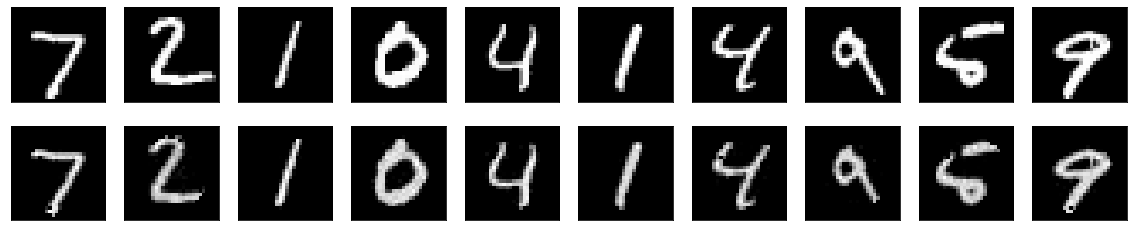

In [0]:
#Basic - Dense1
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
plt.title('Dense 1')
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model1(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Prediction - 2 Hidden Layers


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



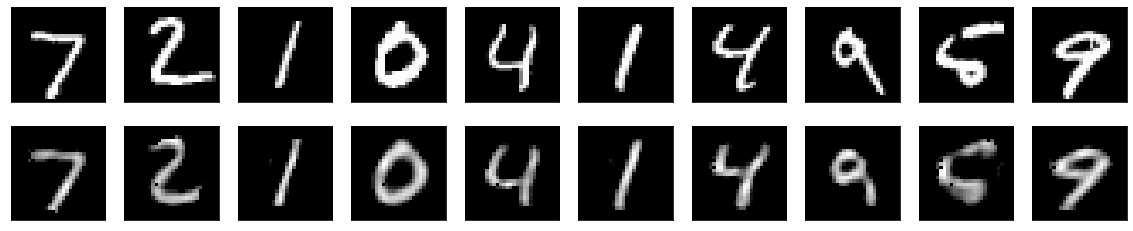

In [0]:
#Predictions - Basic Dense 2
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model2(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Prediction - 3 Hidden Layers


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



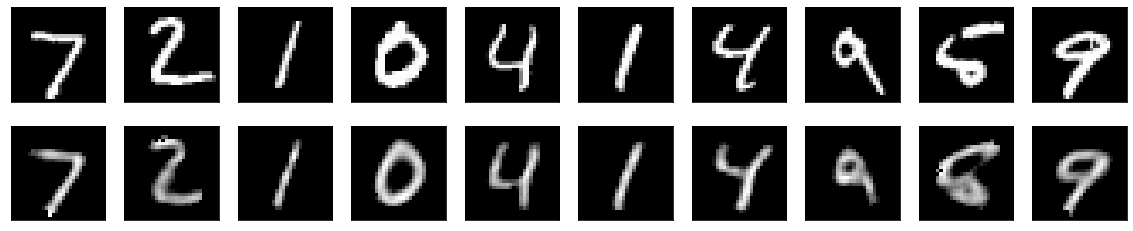

In [0]:
#Predictions - Basic Dense 3
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model3(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Encoder - Decoder Models for 2 different CNN layers

Building 3 encoder and decoder layers for 2 different CNN Architectures

CNN Model - **Process the Dataset**

In [0]:
# to train this model we will with original MNIST digits with shape (samples, 3, 28, 28) and we will just normalize pixel values between 0 and 1
# (x_train, _), (x_test, _) = load_data('../input/mnist.npz')
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

**Fitting CNN Models**

CNN Basic Model - Autoencoder

In [0]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder_CNN_Basic = tf.keras.models.Model(input_img, decoded)
autoencoder_CNN_Basic.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder_CNN_Basic.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0     

In [0]:
autoencoder_CNN_Basic.fit(x_train, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

Epoch 1/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2181 - val_loss: 0.1558
Epoch 2/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1444 - val_loss: 0.1347
Epoch 3/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1284 - val_loss: 0.1224
Epoch 4/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1199 - val_loss: 0.1157
Epoch 5/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1147 - val_loss: 0.1116
Epoch 6/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1112 - val_loss: 0.1088
Epoch 7/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1087 - val_loss: 0.1065
Epoch 8/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1068 - val_loss: 0.1046
Epoch 9/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1053 - val_loss: 0.1034
Epoch 10/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1040 - val_lo

**Predictions for CNN Basic Model**

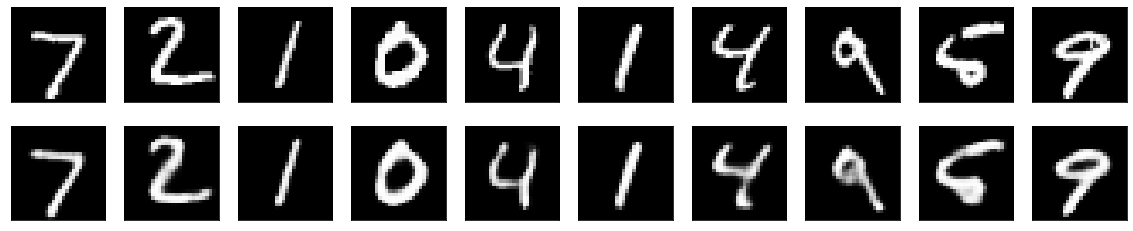

In [0]:
#Predictions for CNN Basic
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(autoencoder_CNN_Basic(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


CNN Complex Model - Autoencoder and fitting model




*   3 Convolution layers with 16,8,8 nodes in encoder each followed by Max pooling layer
*   3 Convolution layers in decoder with 8,8,16 nodes each followed by UpSampling layer to reach the original size of image
*   Batch Normalization after each encoder and decoder layer
*   Filter size has been changed to 5*5
*   Optimizer used - Adam
*   Max pooling and Upsampling layer size - 2*2





In [0]:
#complex layer
from keras import regularizers
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(16, (5, 5), padding='same',activation = "relu",activity_regularizer=regularizers.l1(10e-10))(input_img)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2), (2,2) , padding='same')(x)
x = tf.keras.layers.Conv2D(8, (5, 5), padding='same',activation = "relu",activity_regularizer=regularizers.l1(10e-10))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2), (2,2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (5, 5), padding='same',activation = "relu",activity_regularizer=regularizers.l1(10e-10))(x)
x = tf.keras.layers.BatchNormalization()(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), (2,2), padding='same')(x)


# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = tf.keras.layers.Conv2D(8, (5, 5), padding='same',activation = "relu",activity_regularizer=regularizers.l1(10e-10))(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (5, 5),padding='same',activation = "relu",activity_regularizer=regularizers.l1(10e-10))(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3),activation = "relu",activity_regularizer=regularizers.l1(10e-10))(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder_CNN_Complex = tf.keras.models.Model(input_img, decoded)
autoencoder_CNN_Complex.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder_CNN_Complex.summary()


Using TensorFlow backend.


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 8)         3208      
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 8)         32        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 8)           0   

In [0]:
autoencoder_CNN_Complex.fit(x_train, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

Epoch 1/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1443 - val_loss: 0.1331
Epoch 2/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1182 - val_loss: 0.1105
Epoch 3/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1093 - val_loss: 0.1046
Epoch 4/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1040 - val_loss: 0.1005
Epoch 5/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1010 - val_loss: 0.0987
Epoch 6/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0988 - val_loss: 0.0962
Epoch 7/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0971 - val_loss: 0.0949
Epoch 8/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0953 - val_loss: 0.0940
Epoch 9/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0946 - val_loss: 0.0925
Epoch 10/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0931 - val_lo

**Predictions for CNN Complex Model**

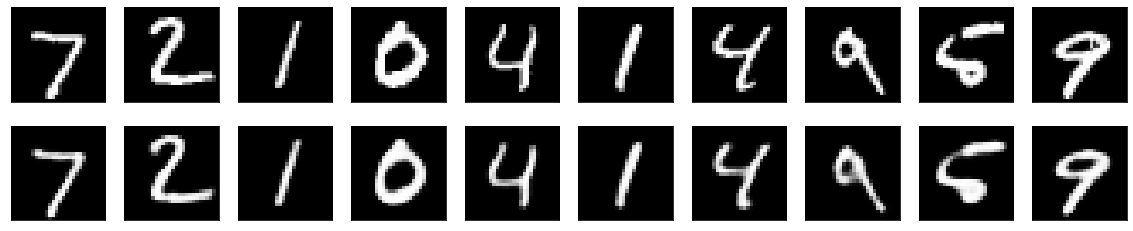

In [0]:
#Predictions for CNN Complex
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(autoencoder_CNN_Complex(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


## **Comparing Dense and CNN Models Results** 





| Model Name | Loss Values |
| --- | --- |
| Dense with 1  | 1.065 |
| Dense with 2  | 3.919 |
| Dense with 2  | 4.319 |
| CNN Basic     | 0.0862 |
| CNN Complex   | 0.0788 |


The above comparison shows the 3 different dense architectures with 1,2 and 3 hidden layers with size getting halved in each layer.

The loss values are observed to be increasing by adding layers and reducing the size in each subsequent layer.
This is because we are compressing the image and hence there is some loss of information in each layer because of which loss is increasing and accuracy is lower by increasing layer.

When Comparing dense layer with CNN models, we can see significant reduction in loss this is due to the fact that CNN works better in case of image data when compared to dense architecture.

When the changes has been made to the basic CNN model by increasing filter size and batch normalization, we can see the loss dropped even more. Different image plots have been shown above which indicates the prediction done by all models.
The loss is calculated using binary cross entropy in case of CNN models and mean squared error in case of Dense architecture

## **Part 2 Denoising Autoencoder**

In [0]:
#Denosing Dense
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train / 255.
x_test = x_test / 255
x_train = x_train.astype(np.float32)
# Introduce noise with a probability factor of 0.5
noise_factor = 0.5
x_train_noisy = x_train + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

x_train_noisy = np.reshape(x_train_noisy, (x_train_noisy.shape[0], 784))
x_test_noisy = np.reshape(x_test_noisy, (x_test_noisy.shape[0], 784))
x_train_noisy = x_train_noisy.astype(np.float32)
training_dataset = tf.data.Dataset.from_tensor_slices(x_train_noisy).batch(256)
x_train_noisy.shape

(60000, 784)

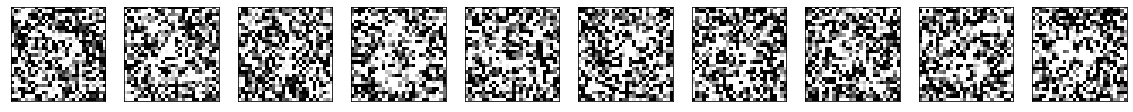

In [0]:
# Plot figures to show what the noisy digits look like
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Dense Architecture - model fitting

In [0]:
dense_model = Autoencoder3(intermediate_dim=256, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)
train_loop(dense_model, opt, loss, training_dataset, 100)

Epoch 1/100. Loss: 642.09765625
Epoch 2/100. Loss: 57.95573806762695
Epoch 3/100. Loss: 57.95283126831055
Epoch 4/100. Loss: 57.94089889526367
Epoch 5/100. Loss: 57.92817687988281
Epoch 6/100. Loss: 57.7819938659668
Epoch 7/100. Loss: 57.19076156616211
Epoch 8/100. Loss: 57.145782470703125
Epoch 9/100. Loss: 57.13530731201172
Epoch 10/100. Loss: 57.12788772583008
Epoch 11/100. Loss: 56.86481475830078
Epoch 12/100. Loss: 56.81941223144531
Epoch 13/100. Loss: 56.547401428222656
Epoch 14/100. Loss: 56.505313873291016
Epoch 15/100. Loss: 56.462589263916016
Epoch 16/100. Loss: 56.43531036376953
Epoch 17/100. Loss: 56.37369918823242
Epoch 18/100. Loss: 56.21220779418945
Epoch 19/100. Loss: 56.07099914550781
Epoch 20/100. Loss: 55.90617370605469
Epoch 21/100. Loss: 55.63568115234375
Epoch 22/100. Loss: 55.53232955932617
Epoch 23/100. Loss: 55.528594970703125
Epoch 24/100. Loss: 55.45921325683594
Epoch 25/100. Loss: 55.45344924926758
Epoch 26/100. Loss: 55.45188903808594
Epoch 27/100. Loss: 55

Predictions - Dense


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



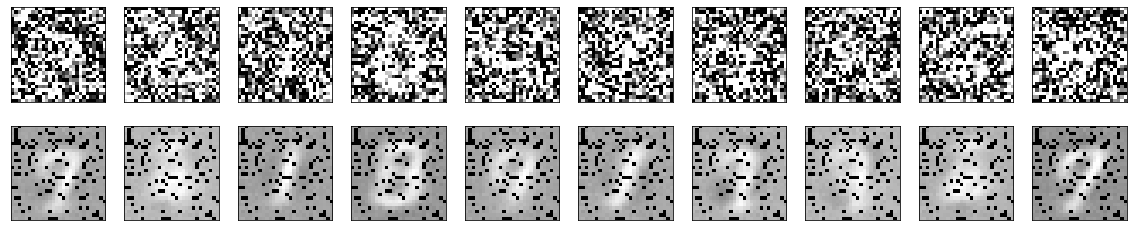

In [0]:
#For noisy data - Dense
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test_noisy[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(dense_model(x_test_noisy)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

CNN data preparation 

In [0]:
#DeNoising CNN
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Introduce noise with a probability factor of 0.5
noise_factor = 0.5
x_train_noisy = x_train + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

Denoising with basic CNN 

In [0]:
autoencoder_CNN_Basic.fit(x_train_noisy, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test_noisy, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

Epoch 1/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2627 - val_loss: 0.2402
Epoch 2/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2355 - val_loss: 0.2307
Epoch 3/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2293 - val_loss: 0.2264
Epoch 4/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2255 - val_loss: 0.2230
Epoch 5/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2226 - val_loss: 0.2206
Epoch 6/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2203 - val_loss: 0.2190
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2185 - val_loss: 0.2166
Epoch 8/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2169 - val_loss: 0.2150
Epoch 9/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2157 - val_loss: 0.2141
Epoch 10/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2146 - val_lo

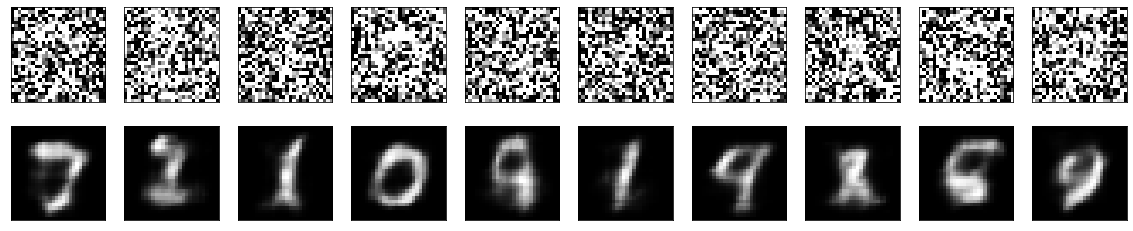

In [0]:
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test_noisy[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(autoencoder_CNN_Basic(x_test_noisy)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Denoising with Complex CNN

In [0]:
autoencoder_CNN_Complex.fit(x_train_noisy, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test_noisy, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

Epoch 1/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1937 - val_loss: 0.1833
Epoch 2/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1777 - val_loss: 0.1743
Epoch 3/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1740 - val_loss: 0.1710
Epoch 4/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1718 - val_loss: 0.1702
Epoch 5/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1704 - val_loss: 0.1683
Epoch 6/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1694 - val_loss: 0.1680
Epoch 7/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1684 - val_loss: 0.1669
Epoch 8/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1676 - val_loss: 0.1660
Epoch 9/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1671 - val_loss: 0.1658
Epoch 10/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1664 - val_lo

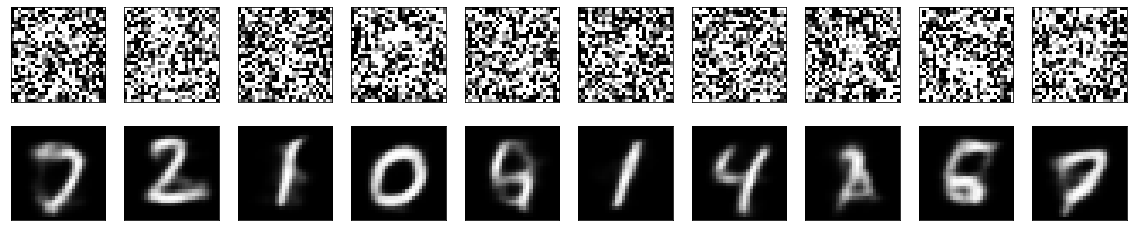

In [0]:
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test_noisy[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(autoencoder_CNN_Complex(x_test_noisy)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

| Model Name | Loss Values |
| --- | --- |
| Dense with 3 hidden | 52.87 |
| CNN Basic           | 0.1941 |
| CNN Complex         | 0.1589 |


The above comparison shows the 3 architectures dense with 3 hidden layers , basic CNN and complex CNN.
Among these 3 models, CNN with complex architecture is performing best as was observed before.
The main difference between the two diiferent (fully connected dense layer and CNN ) is CNNs have convolution and pooling layers, where as dense architecture have only fully connected layers.

CNNs perform better for image data and are known to reduce the complexity of the model (faster training, needs fewer samples, reduces the chance of overfitting)

There are fewer parameters to learn in CNN which reduces the chance of overfitting as the model would be less complex than a fully connected network.

##**Part 3 Text Noise Removal**

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import os
from pathlib import Path
import glob
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from skimage.io import imread, imshow, imsave
from keras.preprocessing.image import load_img, array_to_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Input , BatchNormalization , LeakyReLU
from keras.optimizers import SGD, Adam, Adadelta, Adagrad
from keras import backend as K
from keras.metrics import RootMeanSquaredError
from sklearn.model_selection import train_test_split
np.random.seed(111)
print('TensorFlow version:', tf.__version__)
print('Is Executing Eagerly?', tf.executing_eagerly())
! git clone https://github.com/Aastha1794/Deep_Learning.git

from zipfile import ZipFile 
with ZipFile("/content/Deep_Learning/train.zip", 'r') as zip: 
    print("Extracting")
    zip.extractall()
    print("done")

with ZipFile("/content/Deep_Learning/train_cleaned.zip", 'r') as zip: 
    print("Extracting")
    zip.extractall()
    print("done")

with ZipFile("/content/Deep_Learning/test.zip", 'r') as zip: 
    print("Extracting")
    zip.extractall()
    print("done")

train_path= "/content/train/"
train_images = os.listdir(train_path)
train_clean_path = "/content/train_cleaned/"
train_labels = os.listdir(train_clean_path)
test_path= "/content/test/"
test_labels = os.listdir(test_path)


TensorFlow version: 2.2.0-rc3
Is Executing Eagerly? True
Cloning into 'Deep_Learning'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 26 (delta 12), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (26/26), done.
Extracting
done
Extracting
done
Extracting
done


In [0]:
X = []
Y = []
Z = []
for img in train_images:
    img = load_img(train_path+"/"+img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    X.append(img)

for img in train_labels:
    img = load_img(train_clean_path+"/"+img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    Y.append(img)

for img in test_labels:
    img = load_img(test_path+"/"+img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.

    Z.append(img)

X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)

print("Size of X : ", X.shape)
print("Size of Y : ", Y.shape)
print("Size of Z : ", Z.shape)

# Split the dataset into training and validation. Always set the random state!!
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.1, random_state=111)
print("Total number of training samples: ", X_train.shape)
print("Total number of validation samples: ", X_valid.shape)



/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Size of X :  (144, 420, 540, 1)
Size of Y :  (144, 420, 540, 1)
Size of Z :  (72, 420, 540, 1)
Total number of training samples:  (129, 420, 540, 1)
Total number of validation samples:  (15, 420, 540, 1)


In [0]:
#CNN Basic 

input_img = Input(shape=(420, 540, 1)) # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder_CNN_Basic = Model(input_img, decoded)
autoencoder_CNN_Basic.compile(optimizer=Adam(learning_rate=10e-4), loss='mean_squared_error',metrics=[RootMeanSquaredError()])
autoencoder_CNN_Basic.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 420, 540, 1)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 420, 540, 16)      160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 210, 270, 16)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 210, 270, 8)       1160      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 105, 135, 8)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 105, 135, 8)       584       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 53, 68, 8)         0   

In [0]:
# Train your model
autoencoder_CNN_Basic.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_valid, y_valid))

Train on 129 samples, validate on 15 samples
Epoch 1/100
129/129 [==============================] - 2s 17ms/step - loss: 0.1988 - root_mean_squared_error: 0.4458 - val_loss: 0.1165 - val_root_mean_squared_error: 0.3413
Epoch 2/100
129/129 [==============================] - 1s 9ms/step - loss: 0.0828 - root_mean_squared_error: 0.2878 - val_loss: 0.0842 - val_root_mean_squared_error: 0.2901
Epoch 3/100
129/129 [==============================] - 1s 9ms/step - loss: 0.0824 - root_mean_squared_error: 0.2870 - val_loss: 0.0840 - val_root_mean_squared_error: 0.2899
Epoch 4/100
129/129 [==============================] - 1s 9ms/step - loss: 0.0805 - root_mean_squared_error: 0.2836 - val_loss: 0.0755 - val_root_mean_squared_error: 0.2749
Epoch 5/100
129/129 [==============================] - 1s 9ms/step - loss: 0.0716 - root_mean_squared_error: 0.2677 - val_loss: 0.0714 - val_root_mean_squared_error: 0.2672
Epoch 6/100
129/129 [==============================] - 1s 9ms/step - loss: 0.0657 - root_

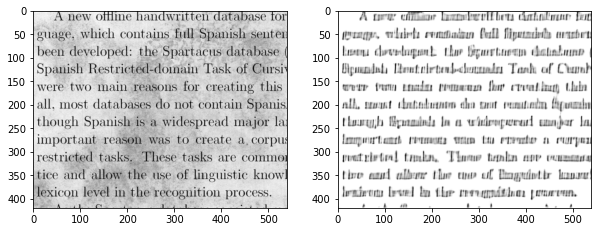

In [0]:
# Compute the prediction
predicted_label = np.squeeze(autoencoder_CNN_Basic.predict(Z))
f, ax = plt.subplots(1,2, figsize=(10,8))
ax[0].imshow(np.squeeze(Z[1]), cmap='gray')
ax[1].imshow(np.squeeze(predicted_label[1]), cmap='gray')
plt.show()


Train and fit CNN Complex Model 1

In [0]:
# cnn complex1
# Lets' define our autoencoder now
def build_autoencoder1():
    input_img = Input(shape=(420,540,1), name='image_input')
    
    #enoder 
   
    x = Conv2D(64, (3, 3), padding='same',activation = "relu")(input_img)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2) , padding='same')(x)
    x = Conv2D(32, (5, 5), padding='same',activation = "relu")(x)
    x = BatchNormalization()(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)


    #decoder

    x = Conv2D(32, (5, 5), padding='same',activation = "relu")(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3),padding='same',activation = "relu")(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    
    #model
    autoencoder = Model(inputs=input_img, outputs=decoded)
    autoencoder.compile(optimizer=Adam(learning_rate=10e-4), loss='mean_squared_error',metrics=[RootMeanSquaredError()])
    return autoencoder
autoencoder_CNN_Complex1 = build_autoencoder1()
autoencoder_CNN_Complex1.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     (None, 420, 540, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 420, 540, 64)      640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 420, 540, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 210, 270, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 210, 270, 32)      51232     
_________________________________________________________________
batch_normalization_2 (Batch (None, 210, 270, 32)      128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 105, 135, 32)      0   

In [0]:
# Train your model
autoencoder_CNN_Complex1.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_valid, y_valid))


Train on 129 samples, validate on 15 samples
Epoch 1/100
129/129 [==============================] - 17s 129ms/step - loss: 0.0728 - root_mean_squared_error: 0.2698 - val_loss: 0.0731 - val_root_mean_squared_error: 0.2703
Epoch 2/100
129/129 [==============================] - 8s 58ms/step - loss: 0.0431 - root_mean_squared_error: 0.2075 - val_loss: 0.0645 - val_root_mean_squared_error: 0.2540
Epoch 3/100
129/129 [==============================] - 8s 58ms/step - loss: 0.0342 - root_mean_squared_error: 0.1849 - val_loss: 0.0683 - val_root_mean_squared_error: 0.2612
Epoch 4/100
129/129 [==============================] - 8s 58ms/step - loss: 0.0284 - root_mean_squared_error: 0.1684 - val_loss: 0.0801 - val_root_mean_squared_error: 0.2831
Epoch 5/100
129/129 [==============================] - 8s 58ms/step - loss: 0.0241 - root_mean_squared_error: 0.1552 - val_loss: 0.0830 - val_root_mean_squared_error: 0.2881
Epoch 6/100
129/129 [==============================] - 8s 58ms/step - loss: 0.0214 

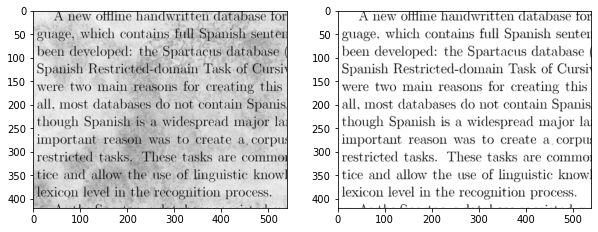

In [0]:
# Compute the prediction - CNN Complex Model 1
predicted_label = np.squeeze(autoencoder_CNN_Complex1.predict(Z))
f, ax = plt.subplots(1,2, figsize=(10,8))
ax[0].imshow(np.squeeze(Z[1]), cmap='gray')
ax[1].imshow(np.squeeze(predicted_label[1]), cmap='gray')
plt.show()


Training CNN Complex Model and predicting

In [0]:
# cnn complex2
# Lets' define our autoencoder now
def build_autoencoder1():
    input_img = Input(shape=(420,540,1), name='image_input')
    
    #enoder 
    x = Conv2D(32, (3, 3), padding='same', activation=tf.nn.leaky_relu )(input_img)
    x = MaxPooling2D((2, 2) , padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same',activation=tf.nn.leaky_relu )(x)
    encoded = BatchNormalization()(x)
    

    #decoder
    x = Conv2D(64, (3, 3), padding='same',activation=tf.nn.leaky_relu )(encoded)
    x = Conv2D(32, (3, 3),padding='same',activation=tf.nn.leaky_relu )(x)
    x = UpSampling2D((2, 2))(x)
    x = BatchNormalization()(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    
    #model
    autoencoder = Model(inputs=input_img, outputs=decoded)
    autoencoder.compile(optimizer=Adam(learning_rate=10e-4), loss='mean_squared_error',metrics=[RootMeanSquaredError()])
    return autoencoder
autoencoder_CNN_Complex2 = build_autoencoder1()
autoencoder_CNN_Complex2.summary()


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     (None, 420, 540, 1)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 420, 540, 32)      320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 210, 270, 32)      0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 210, 270, 32)      128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 210, 270, 64)      18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 210, 270, 64)      256       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 210, 270, 64)      3692

In [0]:
# Train your model
autoencoder_CNN_Complex2.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_valid, y_valid))


Train on 129 samples, validate on 15 samples
Epoch 1/100
129/129 [==============================] - 7s 53ms/step - loss: 0.1077 - root_mean_squared_error: 0.3282 - val_loss: 0.1679 - val_root_mean_squared_error: 0.4097
Epoch 2/100
129/129 [==============================] - 5s 39ms/step - loss: 0.0545 - root_mean_squared_error: 0.2334 - val_loss: 0.1098 - val_root_mean_squared_error: 0.3314
Epoch 3/100
129/129 [==============================] - 5s 39ms/step - loss: 0.0392 - root_mean_squared_error: 0.1981 - val_loss: 0.0821 - val_root_mean_squared_error: 0.2865
Epoch 4/100
129/129 [==============================] - 5s 39ms/step - loss: 0.0308 - root_mean_squared_error: 0.1756 - val_loss: 0.0731 - val_root_mean_squared_error: 0.2703
Epoch 5/100
129/129 [==============================] - 5s 39ms/step - loss: 0.0256 - root_mean_squared_error: 0.1600 - val_loss: 0.0716 - val_root_mean_squared_error: 0.2677
Epoch 6/100
129/129 [==============================] - 5s 39ms/step - loss: 0.0212 - 

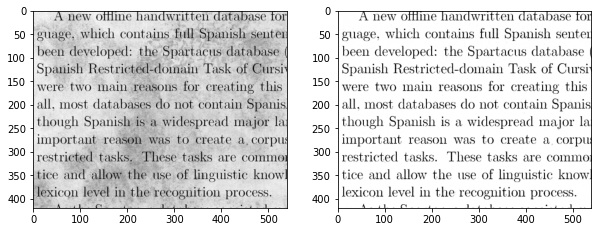

In [0]:
# Compute the prediction
predicted_label = np.squeeze(autoencoder_CNN_Complex2.predict(Z))
f, ax = plt.subplots(1,2, figsize=(10,8))
ax[0].imshow(np.squeeze(Z[1]), cmap='gray')
ax[1].imshow(np.squeeze(predicted_label[1]), cmap='gray')
plt.show()

Training CNN Complex Model and predicting

Preparing Dataset

Dataset for dense multilayer

In [0]:

X = []
Y = []
Z = []
for img in train_images:
    img = load_img(train_path+"/"+img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    X.append(img)

for img in train_labels:
    img = load_img(train_clean_path+"/"+img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    Y.append(img)

for img in test_labels:
    img = load_img(test_path+"/"+img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.

    Z.append(img)

X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)

print("Size of X : ", X.shape)
print("Size of Y : ", Y.shape)
print("Size of Z : ", Z.shape)

# Split the dataset into training and validation. Always set the random state!!
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.1, random_state=111)
print("Total number of training samples: ", X_train.shape)
print("Total number of validation samples: ", X_valid.shape)



/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Size of X :  (144, 420, 540, 1)
Size of Y :  (144, 420, 540, 1)
Size of Z :  (72, 420, 540, 1)
Total number of training samples:  (129, 420, 540, 1)
Total number of validation samples:  (15, 420, 540, 1)


Dense dataset preparation, autoencoder, fitting and prediction


In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], 226800))
y_train = np.reshape(y_train, (y_train.shape[0], 226800))
X_valid = np.reshape(X_valid, (X_valid.shape[0], 226800))
y_valid = np.reshape(y_valid, (y_valid.shape[0], 226800))



In [0]:

def build_autoencoder():
    input_img = Input(shape=(226800,))
    # Encoder
    x = Dense(units = 64, activation = 'relu')(input_img)
    x = Dense(128, activation = 'relu')(x)
    encoder = Dense(32, activation = tf.nn.relu)(x)

    # Decoder
    #x = Dense(32, activation = tf.nn.relu)(encoder)
    x = Dense(128, activation = tf.nn.relu)(encoder)
    x = Dense(128, activation = tf.nn.relu)(x)
    decoder = Dense(units = 226800, activation = "sigmoid")(x)

    #model
    autoencoder = Model(inputs=input_img, outputs=decoder)
    autoencoder.compile(loss='mse', optimizer=Adam(learning_rate=1e-4),metrics=[RootMeanSquaredError()])
    return autoencoder

autoencoder_Dense = build_autoencoder()
autoencoder_Dense.summary()


Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 226800)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                14515264  
_________________________________________________________________
dense_8 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_10 (Dense)             (None, 128)               4224      
_________________________________________________________________
dense_11 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_12 (Dense)             (None, 226800)            2925

In [0]:
#from keras.callbacks import TensorBoard
#tensorboard = TensorBoard(log_dir="./tmp/autoencoder")

autoencoder_Dense.fit(X_train, y_train, epochs=100, batch_size=4, 
                shuffle=True, validation_data=(X_valid, y_valid)
                )

Train on 129 samples, validate on 15 samples
Epoch 1/100
129/129 [==============================] - 2s 15ms/step - loss: 0.1341 - root_mean_squared_error: 0.3662 - val_loss: 0.0754 - val_root_mean_squared_error: 0.2746
Epoch 2/100
129/129 [==============================] - 2s 14ms/step - loss: 0.0706 - root_mean_squared_error: 0.2657 - val_loss: 0.0677 - val_root_mean_squared_error: 0.2601
Epoch 3/100
129/129 [==============================] - 2s 14ms/step - loss: 0.0662 - root_mean_squared_error: 0.2574 - val_loss: 0.0673 - val_root_mean_squared_error: 0.2594
Epoch 4/100
129/129 [==============================] - 2s 14ms/step - loss: 0.0657 - root_mean_squared_error: 0.2563 - val_loss: 0.0671 - val_root_mean_squared_error: 0.2591
Epoch 5/100
129/129 [==============================] - 2s 14ms/step - loss: 0.0652 - root_mean_squared_error: 0.2554 - val_loss: 0.0663 - val_root_mean_squared_error: 0.2575
Epoch 6/100
129/129 [==============================] - 2s 14ms/step - loss: 0.0645 - 

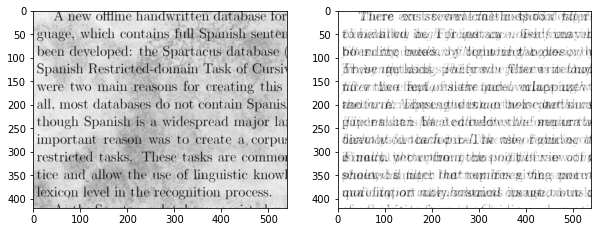

In [0]:
# Compute the prediction
Z = np.reshape(Z,(Z.shape[0],226800))
predicted_label = np.squeeze(autoencoder_Dense.predict(Z))
f, ax = plt.subplots(1,2, figsize=(10,8))
ax[0].imshow(Z[1].reshape(420,540) , cmap='gray')
ax[1].imshow(predicted_label[1].reshape(420,540), cmap='gray')
plt.show()

## **Results and Discussion**

Part 3 of the project consists of "Text Reconstruction Application" with image of size 420*540.

Three different models have been made for reconstructing the text :
Dense Architecture - Consisting of 3 hidden dense layers of different sizes
CNN Basic 
CNN Complex layer 
CNN Complex2 layer 

The output image of each architecture has been shown above and comparing these models, it can be said that CNN Complex model is performing best and giving mean squared error of --.

While dense layer is performing worst giving  very high loss values and poor accuracy.
RMSE value of below 0.05 has been achieved.

| Model Name | RMSE Values |
| --- | --- |
| Dense with 3 hidden | 0.0567 |
| CNN Basic           | 0.1849 |
| CNN Complex 1       | 0.0610 |
| CNN Complex 2       | 0.0339 |
